In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-whitegrid')

from matplotlib.ticker import MultipleLocator
from matplotlib.dates import DateFormatter

myLoc = MultipleLocator(14)

myFmt = DateFormatter('%d/%m')

In [26]:
kone = pd.read_csv('C:/Users/a1703168/Kone.csv', 
                    sep = ';', decimal = ',', skiprows=1)
indeksi = pd.read_csv('C:/Users/a1703168/OMXH25.csv', 
                    sep = ';', decimal = '.', thousands = ',', skiprows=1)

kone.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
0,2019-11-18,56.96,57.02,57.22,57.40,56.80,56.96,57.000,401137,22865136.22,2823,NaN
1,2019-11-15,57.48,57.54,57.12,57.68,56.92,57.62,57.401,422170,24230399.02,2739,NaN
2,2019-11-14,57.08,57.12,57.08,57.34,56.58,57.10,57.044,403728,23029124.84,2611,NaN
3,2019-11-13,57.06,57.10,57.04,57.24,56.78,57.24,57.123,482288,27548889.84,2857,NaN
4,2019-11-12,57.04,57.08,56.80,57.12,56.60,57.04,56.944,447647,25489238.15,2522,NaN


In [27]:
indeksi.head()

,Date,High price,Low price,Closing price,Average price,Total volume,Turnover,Unnamed: 7
0,2019-11-18,4136.41,4098.84,4103.50,NaN,1,NaN,NaN
1,2019-11-15,4126.69,4082.35,4122.12,NaN,1,NaN,NaN
2,2019-11-14,4132.47,4088.91,4089.00,NaN,1,NaN,NaN
3,2019-11-13,4167.09,4121.69,4132.81,NaN,1,NaN,NaN
4,2019-11-12,4173.35,4149.94,4168.18,NaN,1,NaN,NaN


In [6]:
kone.index = pd.to_datetime(kone['Date'])
indeksi.index = pd.to_datetime(indeksi['Date'])

kone.sort_index(inplace = True)
indeksi.sort_index(inplace = True)

In [7]:
kone.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
Date,,,,,,,,,,,,
2018-10-18,2018-10-18,41.03,41.07,41.80,41.85,40.89,41.09,41.232,642152,26477170.79,4001,NaN
2018-10-19,2018-10-19,40.98,41.00,40.85,41.25,40.20,40.95,40.833,966769,39471321.26,6554,NaN
2018-10-22,2018-10-22,40.99,41.02,41.14,41.53,40.90,40.97,41.118,481548,19801499.40,3109,NaN
2018-10-23,2018-10-23,39.92,39.96,40.43,40.47,39.68,39.91,39.994,771512,30857216.42,5362,NaN
2018-10-24,2018-10-24,39.77,39.80,39.91,40.56,39.71,39.73,39.945,877875,35067858.67,5574,NaN


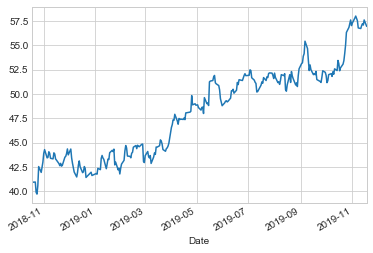

In [8]:
kone['Closing price'].plot()

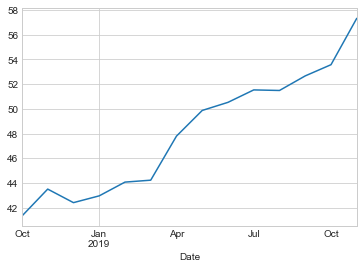

In [9]:
kone['Closing price'].resample('M').mean().plot()

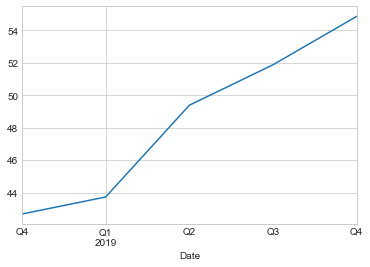

In [10]:
kone['Closing price'].resample('Q').mean().plot()

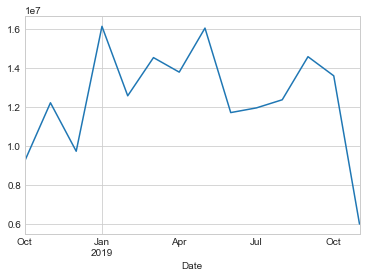

In [13]:
kone['Total volume'].resample('M').sum().plot()

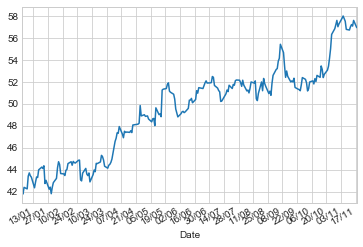

In [14]:
ax1 = kone['Closing price']['2019':].plot()

ax1.xaxis.set_major_locator(myLoc)
ax1.xaxis.set_major_formatter(myFmt)

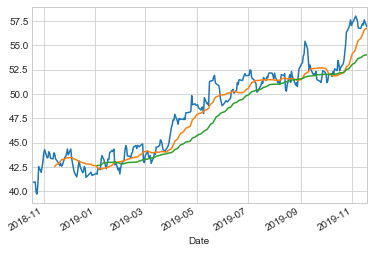

In [16]:
kone['Closing price'].plot()

#liukuvia keskiarvoja
kone['Closing price'].rolling(20).mean().plot()
kone['Closing price'].rolling(50).mean().plot()

In [28]:
kone['Kone%'] = kone['Closing price'].pct_change()
indeksi['OMXH25%'] = indeksi['Closing price'].pct_change()

In [29]:
muutokset = pd.concat([kone['Kone%'], indeksi['OMXH25%']], axis=1)
muutokset.head()

,Kone%,OMXH25%
0,NaN,NaN
1,0.011587,0.004538
2,-0.009025,-0.008035
3,0.002452,0.010714
4,-0.003494,0.008558


Text(0, 0.5, 'Muutos')

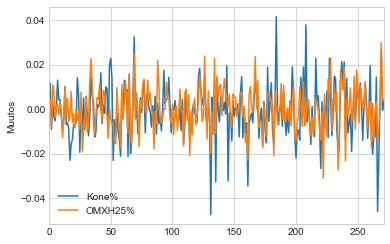

In [35]:
ax2 = muutokset.plot()

ax2.set_ylabel('Muutos')

In [36]:
muutokset.describe()

,Kone%,OMXH25%
count,271.000000,271.000000
mean,-0.001132,-0.000056
std,0.012072,0.009843
min,-0.047405,-0.031080
25%,-0.009026,-0.006226
50%,-0.001150,-0.000407
75%,0.005068,0.006755
max,0.041551,0.029877


In [39]:
muutokset[(abs(muutokset['Kone%'])>0.03) | 
          (abs(muutokset['OMXH25%'])>0.03)]

,Kone%,OMXH25%
69,0.032501,0.024880
131,-0.047405,-0.020093
135,-0.032836,-0.010911
145,-0.032297,0.000871
161,-0.034572,-0.023165
184,0.041551,0.004104
208,0.037912,-0.006325
222,-0.014394,-0.031080
266,-0.046053,-0.013505


In [40]:
muutokset.corr()

,Kone%,OMXH25%
Kone%,1.000000,0.598929
OMXH25%,0.598929,1.000000


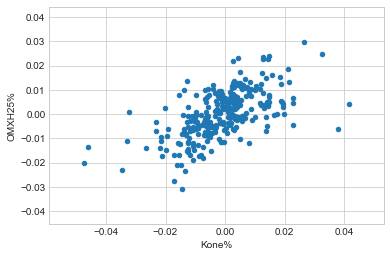

In [41]:
muutokset.plot.scatter(x='Kone%', y='OMXH25%')

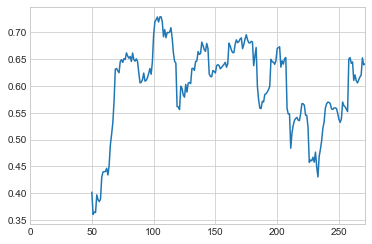

In [43]:
muutokset['Kone%'].rolling(50).corr(muutokset['OMXH25%']).plot()

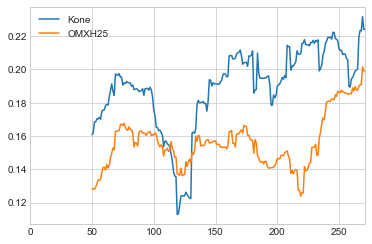

In [47]:
(muutokset['Kone%'].rolling(50).std()*(252**0.5)).plot(label='Kone', legend=True)
(muutokset['OMXH25%'].rolling(50).std()*(252**0.5)).plot(label='OMXH25', legend=True)

(3500, 4300)

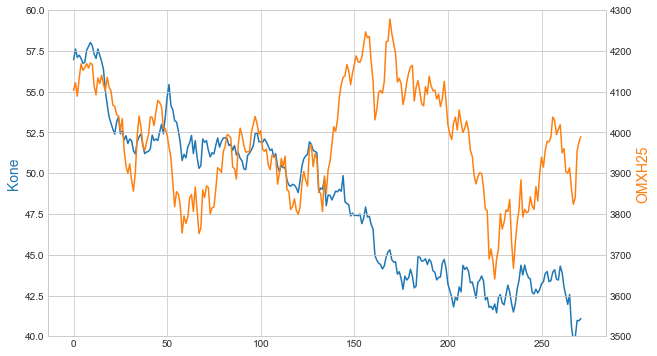

In [49]:
fig, ax = plt.subplots(figsize = (10, 6))


ax.set_ylabel('Kone', color='C0', fontsize=14)
ax.plot(kone['Closing price'], color='C0')
ax.set_ylim(40,60)


ax_T = ax.twinx()

ax_T.set_ylabel('OMXH25', color='C1', fontsize=14)
ax_T.plot(indeksi['Closing price'], color='C1')
ax_T.set_ylim(3500,4300)